#### Using Scikit-learn - Scikit-learn is a comprehensive machine learning library that provides a wide range of algorithms for tasks such as classification, regression, clustering, and dimensionality reduction. It is well-suited for traditional machine learning tasks and is relatively easy to use, making it a good choice for beginners. However, when it comes to deep learning specifically, scikit-learn has limited capabilities compared to Keras and TensorFlow.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Dataset Preparation
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Step 2: Data Preprocessing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:
# Step 3: Model Architecture
model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', random_state=42)

In [ ]:
# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(32,), random_state=42)

In [ ]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.6888888888888889
Confusion Matrix:
[[19  0  0]
 [12  0  1]
 [ 1  0 12]]


#### Using Tensorflow - TensorFlow is a powerful open-source library for numerical computation and deep learning. It provides a flexible and efficient framework for building and training all types of deep learning models. TensorFlow allows for low-level control and customization, which makes it suitable for advanced users and researchers. It also supports distributed computing, enabling the training of large-scale models. TensorFlow has a wide range of pre-built models and extensive community support. In addition to Python, TensorFlow also supports other languages such as C++, Java, and Swift.

2/2 [==============================] - 0s 5ms/step
Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


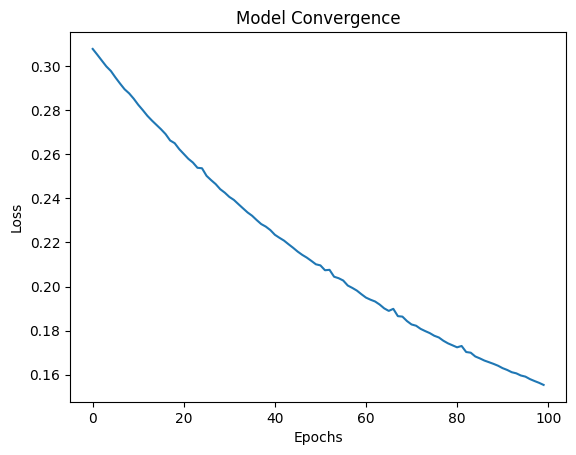

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Dataset Preparation
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Data Preprocessing
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Step 3: Model Architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred_labels == y_test_labels)
confusion_mat = tf.math.confusion_matrix(y_test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat.numpy())

plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
